# Some exercises with Keras using a Kaggle dataset

For computational reasons, let's use this dataset which describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years [more info](https://www.kaggle.com/kumargh/pimaindiansdiabetescsv).

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [4]:
# load pima indians dataset
dataset = np.loadtxt("data/data_pima_indians_diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [5]:
dataset[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01, 1.000e+00],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01, 0.000e+00],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01, 1.000e+00],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01, 0.000e+00],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01, 1.000e+00]])

In [6]:
X[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [7]:
Y[:5]

array([1., 0., 1., 0., 1.])

In [8]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, init=init, activation='relu'))
    model.add(Dense(8, init=init, activation='relu'))
    model.add(Dense(1, init=init, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [9]:
# Fit the model
model = create_model()
history = model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10)

<ipython-input-8-21c09937675e>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init=init, activation='sigmoid'))
<ipython-input-9-811ff480d80f>:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  history = model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10)


Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 584us/step - loss: 3.2770 - accuracy: 0.5817 - val_loss: 1.1252 - val_accuracy: 0.5354
Epoch 2/150
514/514 [==============================] - 0s 117us/step - loss: 0.9837 - accuracy: 0.5895 - val_loss: 1.1768 - val_accuracy: 0.5630
Epoch 3/150
514/514 [==============================] - 0s 117us/step - loss: 0.8629 - accuracy: 0.6323 - val_loss: 1.0001 - val_accuracy: 0.6142
Epoch 4/150
514/514 [==============================] - 0s 102us/step - loss: 0.7872 - accuracy: 0.6673 - val_loss: 0.9076 - val_accuracy: 0.6654
Epoch 5/150
514/514 [==============================] - 0s 108us/step - loss: 0.7711 - accuracy: 0.6459 - val_loss: 0.8165 - val_accuracy: 0.6024
Epoch 6/150
514/514 [==============================] - 0s 112us/step - loss: 0.7384 - accuracy: 0.6693 - val_loss: 0.9302 - val_accuracy: 0.6417
Epoch 7/150
514/514 [==============================] - 0s 110us/step - loss: 0.7235 

Epoch 57/150
514/514 [==============================] - 0s 104us/step - loss: 0.5587 - accuracy: 0.7374 - val_loss: 0.6139 - val_accuracy: 0.6378
Epoch 58/150
514/514 [==============================] - 0s 110us/step - loss: 0.5609 - accuracy: 0.7160 - val_loss: 0.7319 - val_accuracy: 0.6024
Epoch 59/150
514/514 [==============================] - 0s 102us/step - loss: 0.5633 - accuracy: 0.7140 - val_loss: 0.5610 - val_accuracy: 0.7244
Epoch 60/150
514/514 [==============================] - 0s 98us/step - loss: 0.5651 - accuracy: 0.7160 - val_loss: 0.6774 - val_accuracy: 0.5984
Epoch 61/150
514/514 [==============================] - 0s 103us/step - loss: 0.5451 - accuracy: 0.7451 - val_loss: 0.6274 - val_accuracy: 0.7008
Epoch 62/150
514/514 [==============================] - 0s 100us/step - loss: 0.5670 - accuracy: 0.7237 - val_loss: 0.6041 - val_accuracy: 0.7008
Epoch 63/150
514/514 [==============================] - 0s 107us/step - loss: 0.5572 - accuracy: 0.7023 - val_loss: 0.5843 - 

514/514 [==============================] - 0s 101us/step - loss: 0.5166 - accuracy: 0.7588 - val_loss: 0.5994 - val_accuracy: 0.7126
Epoch 114/150
514/514 [==============================] - 0s 102us/step - loss: 0.5229 - accuracy: 0.7257 - val_loss: 0.5663 - val_accuracy: 0.7126
Epoch 115/150
514/514 [==============================] - 0s 104us/step - loss: 0.5285 - accuracy: 0.7451 - val_loss: 0.5617 - val_accuracy: 0.7047
Epoch 116/150
514/514 [==============================] - 0s 101us/step - loss: 0.5247 - accuracy: 0.7335 - val_loss: 0.6232 - val_accuracy: 0.6732
Epoch 117/150
514/514 [==============================] - 0s 103us/step - loss: 0.5159 - accuracy: 0.7510 - val_loss: 0.5994 - val_accuracy: 0.7205
Epoch 118/150
514/514 [==============================] - 0s 110us/step - loss: 0.5176 - accuracy: 0.7588 - val_loss: 0.5604 - val_accuracy: 0.7165
Epoch 119/150
514/514 [==============================] - 0s 100us/step - loss: 0.5192 - accuracy: 0.7393 - val_loss: 0.5843 - val_ac

In [10]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores

768/768 [==============================] - 0s 13us/step

accuracy: 72.14%


[0.5715850902100404, 0.7213541865348816]

In [11]:
probabilities = model.predict(X)
predictions = [float(np.round(x)) for x in probabilities]
accuracy = np.mean(predictions == Y)
print("Prediction Accuracy: %.2f%%" % (accuracy*100))

Prediction Accuracy: 72.14%


In [12]:
for key in history.history.keys():
    print(key)

val_loss
val_accuracy
loss
accuracy


**1.Exercise - Perform a StratifiedKfold validation using scikit-learn (*with the following parameters: n_splits=10, shuffle=True, random_state=seed*) - print mean result.**

In [17]:
# TODO
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# create model
model_gs = KerasClassifier(build_fn=create_model, verbose=0)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cross_val_score(estimator=model_gs, X=X, y=Y, cv=skf)

<ipython-input-8-21c09937675e>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init=init, activation='sigmoid'))


array([0.35064936, 0.36363637, 0.50649351, 0.64935064, 0.58441556,
       0.35064936, 0.59740257, 0.48051947, 0.53947371, 0.68421054])

**2.Exercise - Evaluate model with standardized inputs, using the same StratifiedKFold's parameters.**

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, nb_epoch=150, batch_size=10, verbose=2)))
pipeline = Pipeline(estimators)

# TODO - StratifiedKFold & cross_val_score 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator=pipeline, X=X, y=Y, cv=skf)

print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-8-21c09937675e>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init=init, activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.9395 - accuracy: 0.3517


<ipython-input-8-21c09937675e>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init=init, activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.6622 - accuracy: 0.6715


<ipython-input-8-21c09937675e>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init=init, activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.6947 - accuracy: 0.5702


<ipython-input-8-21c09937675e>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init=init, activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.6093 - accuracy: 0.6946


<ipython-input-8-21c09937675e>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init=init, activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.7208 - accuracy: 0.5658


<ipython-input-8-21c09937675e>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init=init, activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.6400 - accuracy: 0.6397


<ipython-input-8-21c09937675e>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init=init, activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.7342 - accuracy: 0.4472


<ipython-input-8-21c09937675e>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init=init, activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.6991 - accuracy: 0.4790


<ipython-input-8-21c09937675e>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init=init, activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.7071 - accuracy: 0.4798


<ipython-input-8-21c09937675e>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init=init, activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.6578 - accuracy: 0.6503
Standardized: 65.37% (8.85%)


**3.Exercise - Perform a grid search to find the best hyperparameters for {optimizer, init_weights, epoch, batch} - NOTE: test two options, at your choice, for each parameter.**

In [31]:
from sklearn.model_selection import GridSearchCV

# create model
model_gs = KerasClassifier(build_fn=create_model, verbose=0)

# grid search epochs, batch size and optimizer
optimizers = ['Adam', 'rmsprop']
init = []
epochs = [10, 20]
batches = []
param_grid = dict(optimizer=optimizers, nb_epoch=epochs)

# TODO - GridSearchCV & fit
grid = GridSearchCV(model_gs, param_grid, cv=7)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-8-21c09937675e>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init=init, activation='relu'))
<ipython-input-8-21c09937675e>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init=init, activation='sigmoid'))


Best: 0.619683 using {'nb_epoch': 10, 'optimizer': 'rmsprop'}


In [32]:
print(sorted(grid.cv_results_.keys()), '\n')

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_nb_epoch', 'param_optimizer', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'std_fit_time', 'std_score_time', 'std_test_score'] 

0.442428 (0.110049) with: {'nb_epoch': 10, 'optimizer': 'Adam'}
0.619683 (0.106438) with: {'nb_epoch': 10, 'optimizer': 'rmsprop'}
0.523520 (0.137369) with: {'nb_epoch': 20, 'optimizer': 'Adam'}
0.455999 (0.129817) with: {'nb_epoch': 20, 'optimizer': 'rmsprop'}


**4. Exercise - Using the *history*, plot the *accuracy* and *loss*, on training *(accuracy, loss)* and on validation *(val_accuracy, val_loss)***

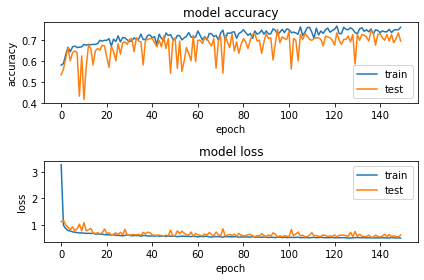

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

# TODO - plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

**5.Exercise - Serialize model to JSON format and weights to HDF5 format.**

In [35]:
from keras.models import model_from_json
import os
import json

# serialize model to JSON
model_json = model.to_json()
print(json.dumps(json.loads(model_json), indent=2))
with open("results/model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("results/weights_json.h5")
print("Saved model to disk")

{
  "class_name": "Sequential",
  "config": {
    "name": "sequential_1",
    "layers": [
      {
        "class_name": "Dense",
        "config": {
          "name": "dense_1",
          "trainable": true,
          "batch_input_shape": [
            null,
            8
          ],
          "dtype": "float32",
          "units": 12,
          "activation": "relu",
          "use_bias": true,
          "kernel_initializer": {
            "class_name": "VarianceScaling",
            "config": {
              "scale": 1.0,
              "mode": "fan_avg",
              "distribution": "uniform",
              "seed": null
            }
          },
          "bias_initializer": {
            "class_name": "Zeros",
            "config": {}
          },
          "kernel_regularizer": null,
          "bias_regularizer": null,
          "activity_regularizer": null,
          "kernel_constraint": null,
          "bias_constraint": null
        }
      },
      {
        "class_name": "Den

**6.Exercise - Load model from disk.**

In [36]:
# load json and create model
json_file = open('results/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("results/weights_json.h5")
print("Loaded model from disk")

Loaded model from disk


**7.Exercise - Provide a model checkpoint every time there is an improvement from previous epoch.**

In [37]:
from keras.callbacks import ModelCheckpoint

# checkpoint
filepath = "results/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# TODO - fit the model
model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, callbacks=callbacks_list, verbose=0)

<ipython-input-37-65577374b902>:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, callbacks=callbacks_list, verbose=0)



Epoch 00001: val_accuracy improved from -inf to 0.72047, saving model to results/weights-improvement-01-0.72.hdf5

Epoch 00002: val_accuracy did not improve from 0.72047

Epoch 00003: val_accuracy improved from 0.72047 to 0.72441, saving model to results/weights-improvement-03-0.72.hdf5

Epoch 00004: val_accuracy did not improve from 0.72441

Epoch 00005: val_accuracy did not improve from 0.72441

Epoch 00006: val_accuracy did not improve from 0.72441

Epoch 00007: val_accuracy did not improve from 0.72441

Epoch 00008: val_accuracy improved from 0.72441 to 0.74409, saving model to results/weights-improvement-08-0.74.hdf5

Epoch 00009: val_accuracy did not improve from 0.74409

Epoch 00010: val_accuracy did not improve from 0.74409

Epoch 00011: val_accuracy did not improve from 0.74409

Epoch 00012: val_accuracy did not improve from 0.74409

Epoch 00013: val_accuracy did not improve from 0.74409

Epoch 00014: val_accuracy did not improve from 0.74409

Epoch 00015: val_accuracy did no


Epoch 00144: val_accuracy did not improve from 0.76378

Epoch 00145: val_accuracy did not improve from 0.76378

Epoch 00146: val_accuracy did not improve from 0.76378

Epoch 00147: val_accuracy did not improve from 0.76378

Epoch 00148: val_accuracy did not improve from 0.76378

Epoch 00149: val_accuracy did not improve from 0.76378

Epoch 00150: val_accuracy did not improve from 0.76378


In [40]:
print(callbacks_list)

**8.Exercise - Provide a model checkpoint for the best training epoch.**

In [41]:
# checkpoint
filepath = "results/weights.best.hdf5"
# TODO - create model checkpoint
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


# TODO - fit the model
model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, callbacks=callbacks_list, verbose=0)

<ipython-input-41-881fc0a552c3>:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, callbacks=callbacks_list, verbose=0)



Epoch 00001: val_accuracy improved from -inf to 0.71654, saving model to results/weights.best.hdf5

Epoch 00002: val_accuracy did not improve from 0.71654

Epoch 00003: val_accuracy did not improve from 0.71654

Epoch 00004: val_accuracy improved from 0.71654 to 0.72441, saving model to results/weights.best.hdf5

Epoch 00005: val_accuracy improved from 0.72441 to 0.73228, saving model to results/weights.best.hdf5

Epoch 00006: val_accuracy did not improve from 0.73228

Epoch 00007: val_accuracy improved from 0.73228 to 0.76378, saving model to results/weights.best.hdf5

Epoch 00008: val_accuracy did not improve from 0.76378

Epoch 00009: val_accuracy did not improve from 0.76378

Epoch 00010: val_accuracy did not improve from 0.76378

Epoch 00011: val_accuracy did not improve from 0.76378

Epoch 00012: val_accuracy did not improve from 0.76378

Epoch 00013: val_accuracy did not improve from 0.76378

Epoch 00014: val_accuracy did not improve from 0.76378

Epoch 00015: val_accuracy did 


Epoch 00145: val_accuracy did not improve from 0.77165

Epoch 00146: val_accuracy did not improve from 0.77165

Epoch 00147: val_accuracy did not improve from 0.77165

Epoch 00148: val_accuracy did not improve from 0.77165

Epoch 00149: val_accuracy did not improve from 0.77165

Epoch 00150: val_accuracy did not improve from 0.77165


**9. Exercise - Create model and set weights from previous best checkpoint.**

In [46]:
# create model
load_model = Sequential()
load_model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
load_model.add(Dense(8, init='uniform', activation='relu'))
load_model.add(Dense(1, init='uniform', activation='sigmoid'))

# TODO - load weights
load_model.load_weights("results/weights.best.hdf5")

# TODO - compile model 
load_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

scores = load_model.evaluate(X, Y)

# TODO - estimate accuracy on whole dataset using loaded weights
print("%s: %.2f%%" % (load_model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 40us/step
accuracy: 79.04%


<ipython-input-46-0378e241d8ba>:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  load_model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
<ipython-input-46-0378e241d8ba>:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  load_model.add(Dense(8, init='uniform', activation='relu'))
<ipython-input-46-0378e241d8ba>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  load_model.add(Dense(1, init='uniform', activation='sigmoid'))


In [45]:
scores

[0.5715850902100404, 0.7213541865348816]

**10. Exercise - Create model with dropout in the input layer with weight constraint, using standardized inputs.**

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from keras.layers import Dropout

# dropout in the input layer with weight constraint
def create_model_dropout_init():
    # create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(8,)))
    model.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
    
    model.add(Dense(8, init='glorot_uniform', activation='relu'))
    
    model.add(Dense(1, init='glorot_uniform', activation='sigmoid'))
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model
 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model_dropout_init, nb_epoch=150, batch_size=10, verbose=2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-47-8fa558c80bb2>:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
<ipython-input-47-8fa558c80bb2>:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init='glorot_uniform', activation='relu'))
<ipython-input-47-8fa558c80bb2>:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init='glorot_uniform', activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.8545 - accuracy: 0.3616


<ipython-input-47-8fa558c80bb2>:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
<ipython-input-47-8fa558c80bb2>:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init='glorot_uniform', activation='relu'))
<ipython-input-47-8fa558c80bb2>:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init='glorot_uniform', activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.6684 - accuracy: 0.5879


<ipython-input-47-8fa558c80bb2>:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
<ipython-input-47-8fa558c80bb2>:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init='glorot_uniform', activation='relu'))
<ipython-input-47-8fa558c80bb2>:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init='glorot_uniform', activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.7772 - accuracy: 0.4707


<ipython-input-47-8fa558c80bb2>:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
<ipython-input-47-8fa558c80bb2>:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init='glorot_uniform', activation='relu'))
<ipython-input-47-8fa558c80bb2>:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init='glorot_uniform', activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.6574 - accuracy: 0.6341


<ipython-input-47-8fa558c80bb2>:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
<ipython-input-47-8fa558c80bb2>:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init='glorot_uniform', activation='relu'))
<ipython-input-47-8fa558c80bb2>:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init='glorot_uniform', activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.7030 - accuracy: 0.5691
Accuracy: 62.52% (10.36%)


**11. Exercise - Create model with dropout in hidden layers with weight constraint, using standardized inputs.**

In [55]:
# TODO
# dropout in the input layer with weight constraint
def create_model_dropout_init():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
    model.add(Dropout(0.2, input_shape=(8,)))
    model.add(Dense(8, init='glorot_uniform', activation='relu'))
    model.add(Dropout(0.2, input_shape=(8,)))
    model.add(Dense(1, init='glorot_uniform', activation='sigmoid'))
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model
 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model_dropout_init, nb_epoch=150, batch_size=10, verbose=2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-55-09647502846b>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
<ipython-input-55-09647502846b>:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init='glorot_uniform', activation='relu'))
<ipython-input-55-09647502846b>:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init='glorot_uniform', activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.7669 - accuracy: 0.4446


<ipython-input-55-09647502846b>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
<ipython-input-55-09647502846b>:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init='glorot_uniform', activation='relu'))
<ipython-input-55-09647502846b>:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init='glorot_uniform', activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.7033 - accuracy: 0.6336


<ipython-input-55-09647502846b>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
<ipython-input-55-09647502846b>:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init='glorot_uniform', activation='relu'))
<ipython-input-55-09647502846b>:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init='glorot_uniform', activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.6624 - accuracy: 0.6498


<ipython-input-55-09647502846b>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
<ipython-input-55-09647502846b>:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init='glorot_uniform', activation='relu'))
<ipython-input-55-09647502846b>:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init='glorot_uniform', activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.7324 - accuracy: 0.4634


<ipython-input-55-09647502846b>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
<ipython-input-55-09647502846b>:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model.add(Dense(8, init='glorot_uniform', activation='relu'))
<ipython-input-55-09647502846b>:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model.add(Dense(1, init='glorot_uniform', activation='sigmoid'))


Epoch 1/1
 - 0s - loss: 0.7027 - accuracy: 0.5740
Accuracy: 60.68% (5.12%)


**12.Exercise - Create a model with a decreasing decay rate, such as *decay_rate = learning_rate / epochs*, starting with *lr=0.1* and *epochs=50*, for a SGD optimizer with momemtum=0.8.**

In [50]:
from keras.optimizers import SGD

# create model
model_sgd_lr = Sequential()
model_sgd_lr.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
model_sgd_lr.add(Dense(8, init='glorot_uniform', activation='relu'))
model_sgd_lr.add(Dense(1, init='glorot_uniform', activation='sigmoid'))

# compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model_sgd_lr.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# fit the model
model_sgd_lr.fit(X, Y, validation_split=0.33, nb_epoch=epochs, batch_size=10)

<ipython-input-50-0f43a2a084a3>:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model_sgd_lr.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
<ipython-input-50-0f43a2a084a3>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model_sgd_lr.add(Dense(8, init='glorot_uniform', activation='relu'))
<ipython-input-50-0f43a2a084a3>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model_sgd_lr.add(Dense(1, init='glorot_uniform', activation='sigmoid'))
<ipython-input-50-0f43a2a084a3>:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model_sgd_lr.fit(X, Y, validation_split=0.33, nb_epoch=epochs, batch_size=10)


Train on 514 samples, validate on 254 samples
Epoch 1/50
514/514 [==============================] - 0s 325us/step - loss: 7.8082 - accuracy: 0.6245 - val_loss: 0.6280 - val_accuracy: 0.6772
Epoch 2/50
514/514 [==============================] - 0s 128us/step - loss: 0.6601 - accuracy: 0.6401 - val_loss: 0.6328 - val_accuracy: 0.6732
Epoch 3/50
514/514 [==============================] - 0s 118us/step - loss: 0.6534 - accuracy: 0.6420 - val_loss: 0.6322 - val_accuracy: 0.6732
Epoch 4/50
514/514 [==============================] - 0s 131us/step - loss: 0.6532 - accuracy: 0.6420 - val_loss: 0.6322 - val_accuracy: 0.6732
Epoch 5/50
514/514 [==============================] - 0s 134us/step - loss: 0.6559 - accuracy: 0.6420 - val_loss: 0.6334 - val_accuracy: 0.6732
Epoch 6/50
514/514 [==============================] - 0s 130us/step - loss: 0.6545 - accuracy: 0.6420 - val_loss: 0.6334 - val_accuracy: 0.6732
Epoch 7/50
514/514 [==============================] - 0s 129us/step - loss: 0.6543 - accur

**13.Exercise - Create a model with a learning rate scheduler for each epoch, with the following conditions:**
* ***initial_lrate = 0.1***
* ***drop = 0.5***
* ***epochs_drop = 10.0***
* ***lrate = initial_lrate $\times$ math.pow(drop, math.floor((1+epoch)/epochs_drop))***

**for the same SGD optimizer with momemtum**

In [52]:
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [56]:
from keras.callbacks import LearningRateScheduler
import math

# create model
model_sgd_lr_schd = Sequential()
model_sgd_lr_schd.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
model_sgd_lr_schd.add(Dense(8, init='glorot_uniform', activation='relu'))
model_sgd_lr_schd.add(Dense(1, init='glorot_uniform', activation='sigmoid'))

# TODO - compile model
epochs = 150
decay = 0.0
momentum = 0.8
model_sgd_lr_schd.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# learning scheduler callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

# TODO - fit the model with the learning scheduler callback
model.fit(X, Y, nb_epoch=epochs, batch_size=10, callbacks=callbacks_list, verbose=1)

Epoch 1/150
768/768 [==============================] - 0s 101us/step - loss: 0.6485 - accuracy: 0.6510
Epoch 2/150
460/768 [================>.............] - ETA: 0s - loss: 0.6343 - accuracy: 0.6761

<ipython-input-56-33880c747083>:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="glorot_uniform")`
  model_sgd_lr_schd.add(Dense(12, input_dim=8, init='glorot_uniform', activation='relu'))
<ipython-input-56-33880c747083>:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="glorot_uniform")`
  model_sgd_lr_schd.add(Dense(8, init='glorot_uniform', activation='relu'))
<ipython-input-56-33880c747083>:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  model_sgd_lr_schd.add(Dense(1, init='glorot_uniform', activation='sigmoid'))
<ipython-input-56-33880c747083>:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X, Y, nb_epoch=epochs, batch_size=10, callbacks=callbacks_list, verbose=1)


768/768 [==============================] - 0s 110us/step - loss: 0.6516 - accuracy: 0.6510
Epoch 3/150
768/768 [==============================] - 0s 106us/step - loss: 0.6499 - accuracy: 0.6510
Epoch 4/150
768/768 [==============================] - 0s 105us/step - loss: 0.6461 - accuracy: 0.6510
Epoch 5/150
768/768 [==============================] - 0s 100us/step - loss: 0.6538 - accuracy: 0.6510
Epoch 6/150
768/768 [==============================] - 0s 104us/step - loss: 0.6525 - accuracy: 0.6510
Epoch 7/150
768/768 [==============================] - 0s 105us/step - loss: 0.6523 - accuracy: 0.6510
Epoch 8/150
768/768 [==============================] - 0s 103us/step - loss: 0.6509 - accuracy: 0.6510
Epoch 9/150
768/768 [==============================] - 0s 102us/step - loss: 0.6523 - accuracy: 0.6510
Epoch 10/150
768/768 [==============================] - 0s 99us/step - loss: 0.6503 - accuracy: 0.6510
Epoch 11/150
768/768 [==============================] - 0s 104us/step - loss: 0.6492 

**14.Exercise - Create a smaller and a larger NN model and compare results.**

In [ ]:
# TODO